# 1 Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

In [2]:
data = pd.read_csv('/kaggle/input/nlp-ulta-skincare-reviews/Ulta Skincare Reviews.csv')
data.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4148 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [4]:
data.isnull().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [5]:
data.fillna('Unknown', inplace=True)

In [6]:
data.isnull().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

# 2 Auto Labeling Sentiment Using VaderSentiment

In [7]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vds = SentimentIntensityAnalyzer()

In [9]:
text =  'I am good for today.'

vds.polarity_scores(text)

{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

In [10]:
#doc = data['Review_Text']

#vds.polarity_scores(doc)

In [11]:
data['score'] = data['Review_Text'].apply(lambda review: vds.polarity_scores(review))

data.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'comp..."
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'co..."
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou..."
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.029, 'neu': 0.758, 'pos': 0.212, 'co..."
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.061, 'neu': 0.718, 'pos': 0.221, 'co..."


In [12]:
data['compound']  = data['score'].apply(lambda score_dict: score_dict['compound'])

data.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,compound
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'comp...",0.7964
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'co...",0.2960
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",0.8347
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.029, 'neu': 0.758, 'pos': 0.212, 'co...",0.8636
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.061, 'neu': 0.718, 'pos': 0.221, 'co...",0.6992


In [13]:
data['sentiment'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

data.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,compound,sentiment
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'comp...",0.7964,pos
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'co...",0.2960,pos
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",0.8347,pos
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.029, 'neu': 0.758, 'pos': 0.212, 'co...",0.8636,pos
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.061, 'neu': 0.718, 'pos': 0.221, 'co...",0.6992,pos


In [14]:
data['Product'].value_counts()

Daily Superfoliant             1500
Daily Microfoliant             1500
Hydro Masque Exfoliant          800
Multi-Vitamin Thermafoliant     350
Name: Product, dtype: int64

In [15]:
data['Brand'].value_counts()

Dermalogica    4150
Name: Brand, dtype: int64

In [16]:
data['sentiment'].value_counts()

pos    3926
neg     224
Name: sentiment, dtype: int64

In [17]:
data.loc[data["sentiment"] == "neg", "sentiment"] = 0
data.loc[data["sentiment"] == "pos", "sentiment"] = 1

In [18]:
data['sentiment'].value_counts()

1    3926
0     224
Name: sentiment, dtype: int64

In [19]:
data = data.astype({"sentiment": int})

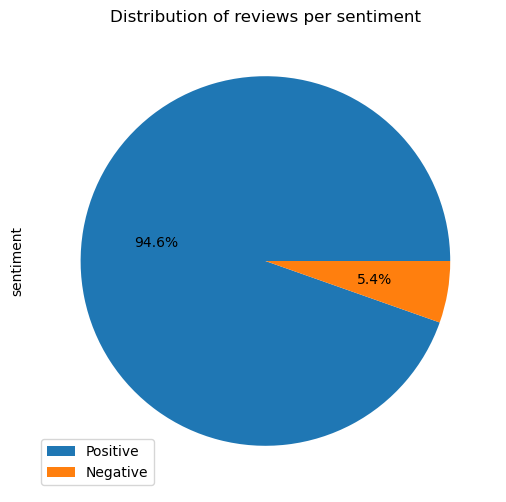

In [20]:
data['sentiment'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['',''],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

# 3 Data Pre-processing

## 3.1 Cleaning Data

In [21]:
# Cleaning data
def remove(tweet):
  #remove mention
  tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
  # remove stock market tickers like $GE
  tweet = re.sub(r'\$\w*', '', tweet)
  # remove old style retweet text "RT"
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'^rt[\s]+', '', tweet)
  # remove hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'^https[\s]+', '', tweet)
  # remove hashtags
  # only removing the hash # sign from the word
  tweet = re.sub(r'#', '', tweet)
  tweet = re.sub(r'%', '', tweet)
  #remove coma
  tweet = re.sub(r',','',tweet)
  #remove angka
  tweet = re.sub('[0-9]+', '', tweet)
  tweet = re.sub(r':', '', tweet)
  #remove space
  tweet = tweet.strip()
  #remove double space
  tweet = re.sub('\s+',' ',tweet)
  return tweet
  
data['cleaning_data'] = data['Review_Text'].apply(lambda x: remove(x.lower()))

In [22]:
data.drop_duplicates(subset ="cleaning_data", keep = 'first', inplace = True)

In [23]:
data

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,compound,sentiment,cleaning_data
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'comp...",0.7964,1,love using this on my face while in the shower...
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'co...",0.2960,1,even better than the daily microfoliant. i'm o...
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",0.8347,1,enjoy this product so much ! i look forward to...
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.029, 'neu': 0.758, 'pos': 0.212, 'co...",0.8636,1,i've never tried anything like this before and...
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.061, 'neu': 0.718, 'pos': 0.221, 'co...",0.6992,1,this exfoliates very nicely and gives a very s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,Much better product than a scrub.,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...",0.4404,1,much better product than a scrub.
4146,Gentle exfoliant- leaves skin smooth & soft,I've been using this exfoliant for a few month...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23,"{'neg': 0.063, 'neu': 0.808, 'pos': 0.128, 'co...",0.8064,1,i've been using this exfoliant for a few month...
4147,One of my favorite skincare products of all time.,My skin looks better now than 10 years ago.,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",0.4404,1,my skin looks better now than years ago.
4148,Ehhh...,This product was useless for me. I should've k...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23,"{'neg': 0.106, 'neu': 0.8, 'pos': 0.094, 'comp...",0.0518,1,this product was useless for me. i should've k...


## 3.2 Remove Stopwords

In [24]:
from nltk.corpus import stopwords

stopword = set(stopwords.words('english'))
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword)
    return text
  
data['tweet_sw'] = data['cleaning_data'].apply(clean_stopwords)

## 3.3 Stemming

In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def porterstemmer(text):
  text = ' '.join(ps.stem(word) for word in text.split() if word in text)
  return text  
data['tweet_stem'] = data['tweet_sw'].apply(porterstemmer)

## 3.4 Lemmatization

In [26]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [27]:
def lemmatization (text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)
data['tweet_clean'] = data['tweet_stem'].apply(lemmatization)

## 3.5 Data Final

In [28]:
data

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,score,compound,sentiment,cleaning_data,tweet_sw,tweet_stem,tweet_clean
0,Perfect,Love using this on my face while in the shower...,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'comp...",0.7964,1,love using this on my face while in the shower...,love using face shower. heats gives light scru...,love use face shower. heat give light scrub nice,love use face shower heat light scrub nice
1,You need this,Even better than the daily microfoliant. I'm o...,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'co...",0.2960,1,even better than the daily microfoliant. i'm o...,even better daily microfoliant. i'm obsessed. ...,even better daili microfoliant. i'm obsessed. ...,well daili microfoliant obsess skin smooth
2,Clean skin,Enjoy this product so much ! I look forward to...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...",0.8347,1,enjoy this product so much ! i look forward to...,enjoy product much ! look forward using - real...,enjoy product much ! look forward use - realli...,enjoy product look forward use realli feel great
3,Love This Stuff!,I've never tried anything like this before and...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.029, 'neu': 0.758, 'pos': 0.212, 'co...",0.8636,1,i've never tried anything like this before and...,i've never tried anything like love it. apply ...,i'v never tri anyth like love it. appli face g...,i'v tri anyth like love appli face littl shoot...
4,This exfoliates very nicely and,This exfoliates very nicely and gives a very s...,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,"{'neg': 0.061, 'neu': 0.718, 'pos': 0.221, 'co...",0.6992,1,this exfoliates very nicely and gives a very s...,exfoliates nicely gives smooth skin irritation...,exfoli nice give smooth skin irrit reaction sk...,exfoli nice smooth skin irrit reaction skin hi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,I would buy this product again,Much better product than a scrub.,Yes,7 years ago,"vernon hills, il",0,1,Daily Microfoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'comp...",0.4404,1,much better product than a scrub.,much better product scrub.,much better product scrub.,well product scrub
4146,Gentle exfoliant- leaves skin smooth & soft,I've been using this exfoliant for a few month...,No,7 years ago,"Humboldt, CA",1,0,Daily Microfoliant,Dermalogica,3/27/23,"{'neg': 0.063, 'neu': 0.808, 'pos': 0.128, 'co...",0.8064,1,i've been using this exfoliant for a few month...,i've using exfoliant months now. depending con...,i'v use exfoli month now. depend condit skin i...,i'v use exfoli month depend condit skin use an...
4147,One of my favorite skincare products of all time.,My skin looks better now than 10 years ago.,Yes,7 years ago,"Albuquerque, NM",2,1,Daily Microfoliant,Dermalogica,3/27/23,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",0.4404,1,my skin looks better now than years ago.,skin looks better years ago.,skin look better year ago.,skin look well year ago
4148,Ehhh...,This product was useless for me. I should've k...,Yes,7 years ago,Fayetteville,1,1,Daily Microfoliant,Dermalogica,3/27/23,"{'neg': 0.106, 'neu': 0.8, 'pos': 0.094, 'comp...",0.0518,1,this product was useless for me. i should've k...,product useless me. known exfoliant use daily ...,product useless me. known exfoli use daili wou...,product useless know exfoli use daili gentl wo...


In [29]:
data.to_excel('skincaredata.xlsx')

# 4 TF - IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(data['tweet_clean'])
vector = vectorizer.transform(data['tweet_clean'])
print(vector)

  (0, 3811)	0.13769194840912682
  (0, 3173)	0.41290598807639545
  (0, 3075)	0.3504833300422451
  (0, 2316)	0.35278166955037893
  (0, 2049)	0.1860887017272084
  (0, 1981)	0.44690274418509585
  (0, 1630)	0.5315288911061257
  (0, 1274)	0.21536497299817586
  (1, 3917)	0.39898743006698156
  (1, 3263)	0.25930582280673004
  (1, 3217)	0.14353038882632507
  (1, 2366)	0.5938266169944086
  (1, 2170)	0.5450958035939177
  (1, 814)	0.321261672540798
  (2, 3811)	0.16100665633596306
  (2, 2810)	0.30499861758631686
  (2, 2707)	0.18246014990727485
  (2, 2029)	0.3091687865956119
  (2, 1564)	0.2941012833504299
  (2, 1417)	0.6215300930209432
  (2, 1324)	0.196781636864581
  (2, 1139)	0.49056846715893226
  (3, 3880)	0.22963689873793366
  (3, 3703)	0.14946571143205561
  (3, 3163)	0.3909321300302453
  :	:
  (3651, 3811)	0.06981784328588819
  (3651, 3785)	0.38578850327347286
  (3651, 2933)	0.3518220182199409
  (3651, 2707)	0.07912079191039231
  (3651, 1916)	0.21030210056149057
  (3651, 1504)	0.2252723708965004


# 5 Split Dataset

In [31]:
from sklearn.model_selection import train_test_split
X = data['tweet_clean']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(vector,y,test_size = 0.2)

# 6 SMOTE

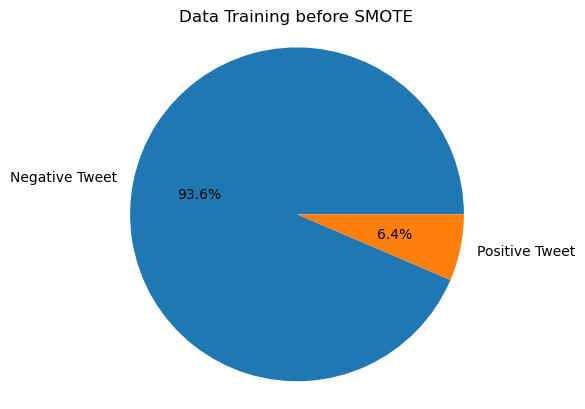

In [32]:
# Class Imbalance Check
plt.pie(y_train.value_counts(), 
        labels=['Negative Tweet','Positive Tweet'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.title("Data Training before SMOTE")
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

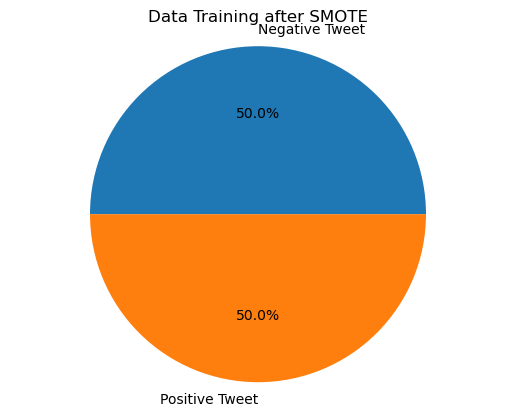

In [34]:
# Class Imbalance Check
plt.pie(y_train_sm.value_counts(), 
        labels=['Negative Tweet','Positive Tweet'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.title("Data Training after SMOTE")
plt.show()

In [35]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_train_sm))

Original dataset shape Counter({1: 2734, 0: 188})
Resampled dataset shape Counter({1: 2734, 0: 2734})


# 6 Model 

In [36]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

## 6.1 Model + SMOTE

In [37]:
# create logistic regression model + SMOTE
logreg = LogisticRegression()
# train model on  vectorised training data
model = logreg.fit(X_train_sm, y_train_sm)

## 6.2 Model

In [38]:
# create logistic regression model
logreg1 = LogisticRegression()
# train model on  vectorised training data
model1 = logreg.fit(X_train, y_train)

# 7 Evaluation Model

## 7.1 Evaluation Model + SMOTE

In [39]:
y_preds_training = logreg.fit(X_train_sm, y_train_sm).predict(X_train)
y_preds_testing = logreg.fit(X_train_sm, y_train_sm).predict(X_test)
accuracy_training = accuracy_score(y_train, y_preds_training)
accuracy_testing = accuracy_score(y_test, y_preds_testing)
print('Accuracy: ', accuracy_training*100, "%")
print('Accuracy: ', accuracy_testing*100, "%")
print("Confusion Matrix training : ")
print(confusion_matrix(y_train, y_preds_training))
print("Confusion Matrix testing : ")
print(confusion_matrix(y_test, y_preds_testing))
print("Classification report testing: ")
print(classification_report(y_test, y_preds_testing))
print("Classification report training : ")
print(classification_report(y_train, y_preds_training))

Accuracy:  96.88569472963724 %
Accuracy:  91.79206566347469 %
Confusion Matrix training : 
[[ 184    4]
 [  87 2647]]
Confusion Matrix testing : 
[[ 17  18]
 [ 42 654]]
Classification report testing: 
              precision    recall  f1-score   support

           0       0.29      0.49      0.36        35
           1       0.97      0.94      0.96       696

    accuracy                           0.92       731
   macro avg       0.63      0.71      0.66       731
weighted avg       0.94      0.92      0.93       731

Classification report training : 
              precision    recall  f1-score   support

           0       0.68      0.98      0.80       188
           1       1.00      0.97      0.98      2734

    accuracy                           0.97      2922
   macro avg       0.84      0.97      0.89      2922
weighted avg       0.98      0.97      0.97      2922



## 7.2 Evaluation Model

In [40]:
y_preds_training1 = logreg1.fit(X_train, y_train).predict(X_train)
y_preds_testing1 = logreg1.fit(X_train, y_train).predict(X_test)
accuracy_training1 = accuracy_score(y_train, y_preds_training1)
accuracy_testing1 = accuracy_score(y_test, y_preds_testing1)
print('Accuracy training: ', accuracy_training1*100, "%")
print('Accuracy testing: ', accuracy_testing1*100, "%")
print("Confusion Matrix training : ")
print(confusion_matrix(y_train, y_preds_training1))
print("Confusion Matrix testing : ")
print(confusion_matrix(y_test, y_preds_testing1))
print("Classification report testing: ")
print(classification_report(y_test, y_preds_testing1))
print("Classification report training : ")
print(classification_report(y_train, y_preds_training1))

Accuracy training:  93.63449691991786 %
Accuracy testing:  95.34883720930233 %
Confusion Matrix training : 
[[   2  186]
 [   0 2734]]
Confusion Matrix testing : 
[[  1  34]
 [  0 696]]
Classification report testing: 
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        35
           1       0.95      1.00      0.98       696

    accuracy                           0.95       731
   macro avg       0.98      0.51      0.52       731
weighted avg       0.96      0.95      0.93       731

Classification report training : 
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       188
           1       0.94      1.00      0.97      2734

    accuracy                           0.94      2922
   macro avg       0.97      0.51      0.49      2922
weighted avg       0.94      0.94      0.91      2922



# 8 SHAP

In [41]:
!pip install shap

## 8 SHAP with SMOTE

In [42]:
import shap

explainer = shap.Explainer(model, X_train_sm, feature_names=vectorizer.get_feature_names())
shap_values = explainer(X_test)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


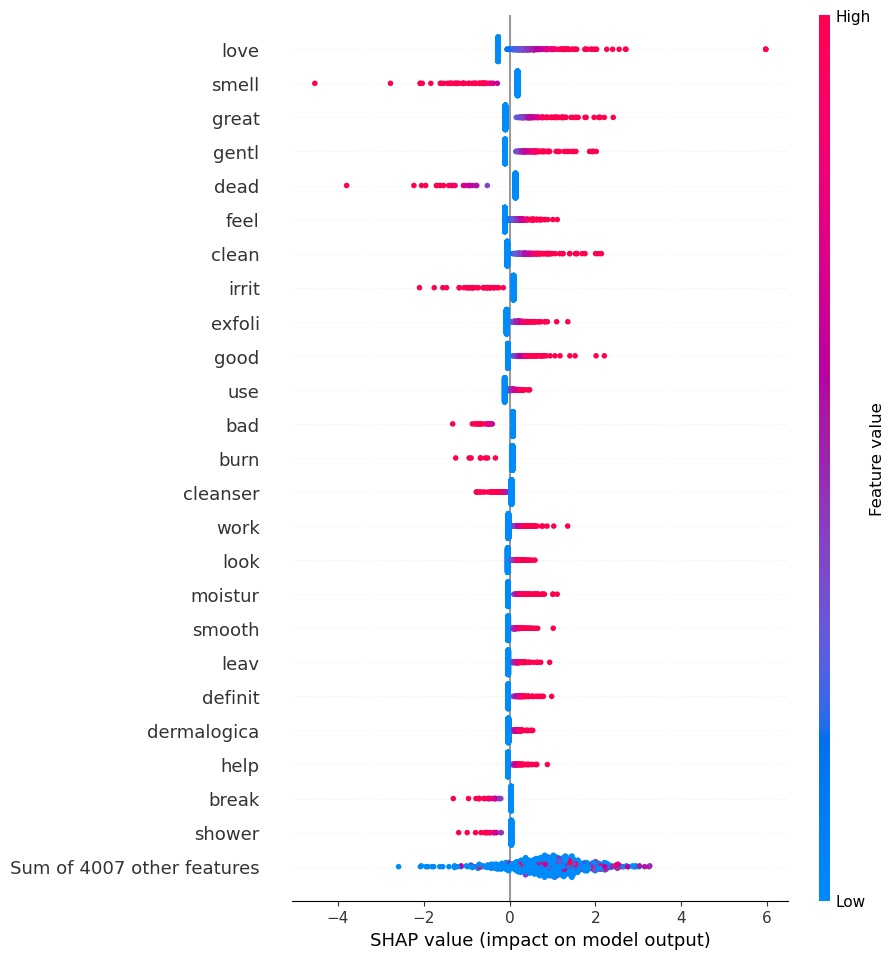

In [43]:
shap.plots.beeswarm(shap_values,max_display=25)

## 8.2 SHAP without SMOTE

In [44]:
explainer1 = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names())
shap_values1 = explainer1(X_test)

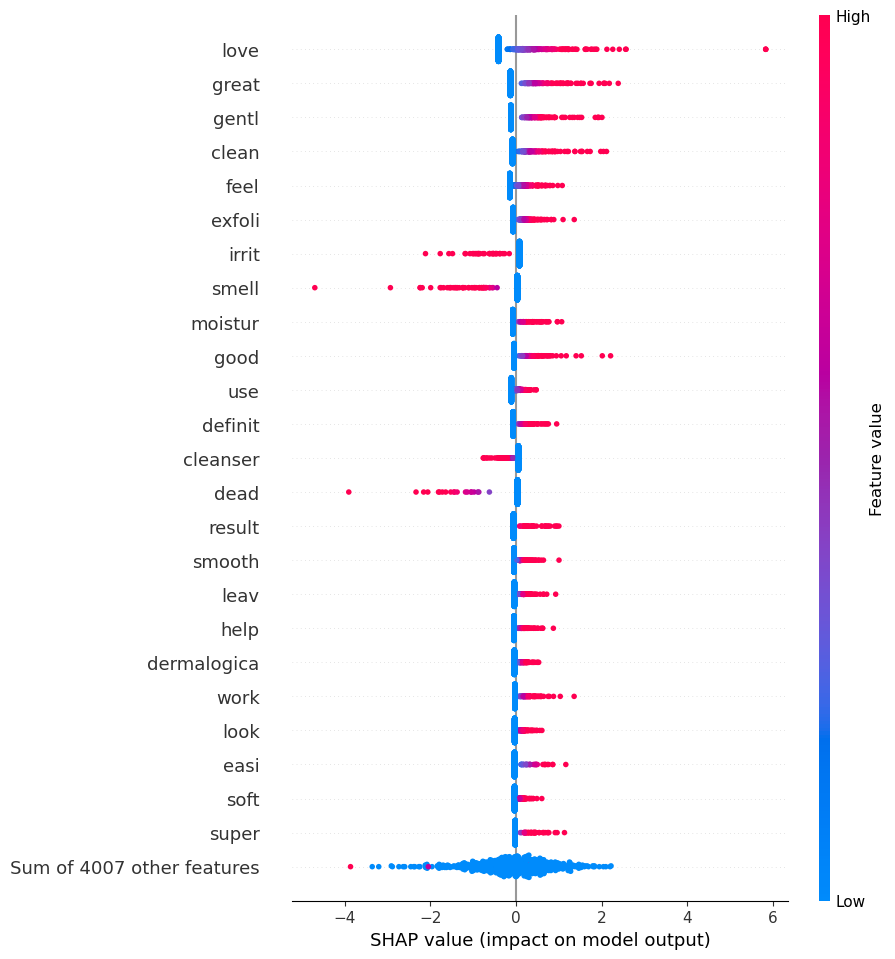

In [45]:
shap.plots.beeswarm(shap_values1,max_display=25)

**The results of sentiment analysis with SHAP interpretation are:**
1. Dermalogica has many benefits for its users, such as being good at cleaning the face, exfoliating the face, and making the face feel smoother. This causes users to feel that Dermalogica products are good and great at solving user skin problems.

2. Dermalogica products are liked by many people but there are some users who don't like dermalogica products. Dermalogica products are claimed by users to have an unpleasant odor and a change in formula compared to dermalogica products which are no longer being used.